In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Define base directories
base_dir = Path('/home/ubuntu/GORMPO_abiomed/cormpo/figures')
methods = {
    'VAE': 'vae_ood_distance_tests',
    'KDE': 'kde_ood_distance_tests',
    'RealNVP': 'realnvp_ood_distance_tests'
}

# Read all results
results_by_dataset = {}

for method_name, method_dir in methods.items():
    method_path = base_dir / method_dir
    if not method_path.exists():
        continue
    
    for dataset_dir in method_path.iterdir():
        if dataset_dir.is_dir():
            dataset_name = dataset_dir.name
            results_file = dataset_dir / 'summary_results.json'
            
            if results_file.exists():
                with open(results_file, 'r') as f:
                    data = json.load(f)
                
                if dataset_name not in results_by_dataset:
                    results_by_dataset[dataset_name] = {}
                
                results_by_dataset[dataset_name][method_name] = data

print(f"Found {len(results_by_dataset)} datasets:")
for dataset_name in results_by_dataset:
    print(f"  - {dataset_name}: {list(results_by_dataset[dataset_name].keys())}")

Found 3 datasets:
  - walker2d_medium_expert_sparse_73: ['VAE', 'KDE', 'RealNVP']
  - halfcheetah_medium_expert_sparse_72.5: ['VAE', 'KDE', 'RealNVP']
  - hopper_medium_expert_sparse_78: ['VAE', 'KDE', 'RealNVP']



Creating plots for walker2d_medium_expert_sparse_73...
  Saved: /home/ubuntu/GORMPO/figures/merged_results/walker2d_medium_expert_sparse_73_comparison.png


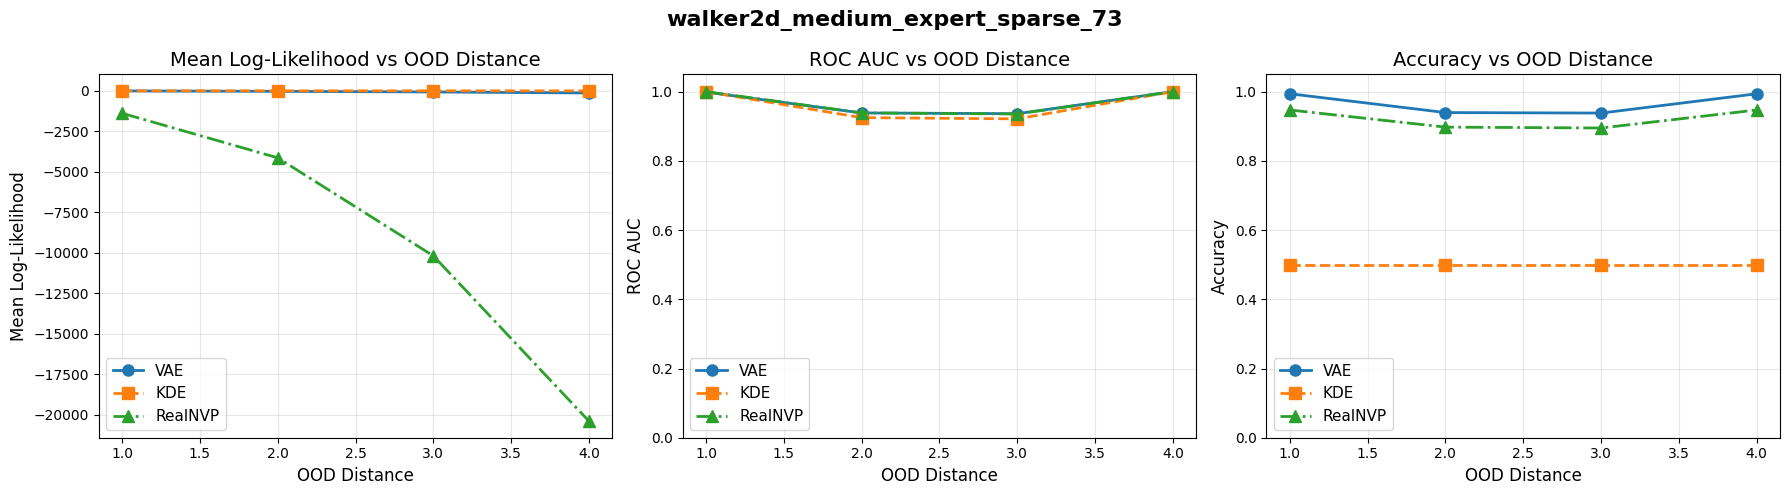


Creating plots for halfcheetah_medium_expert_sparse_72.5...
  Saved: /home/ubuntu/GORMPO/figures/merged_results/halfcheetah_medium_expert_sparse_72.5_comparison.png


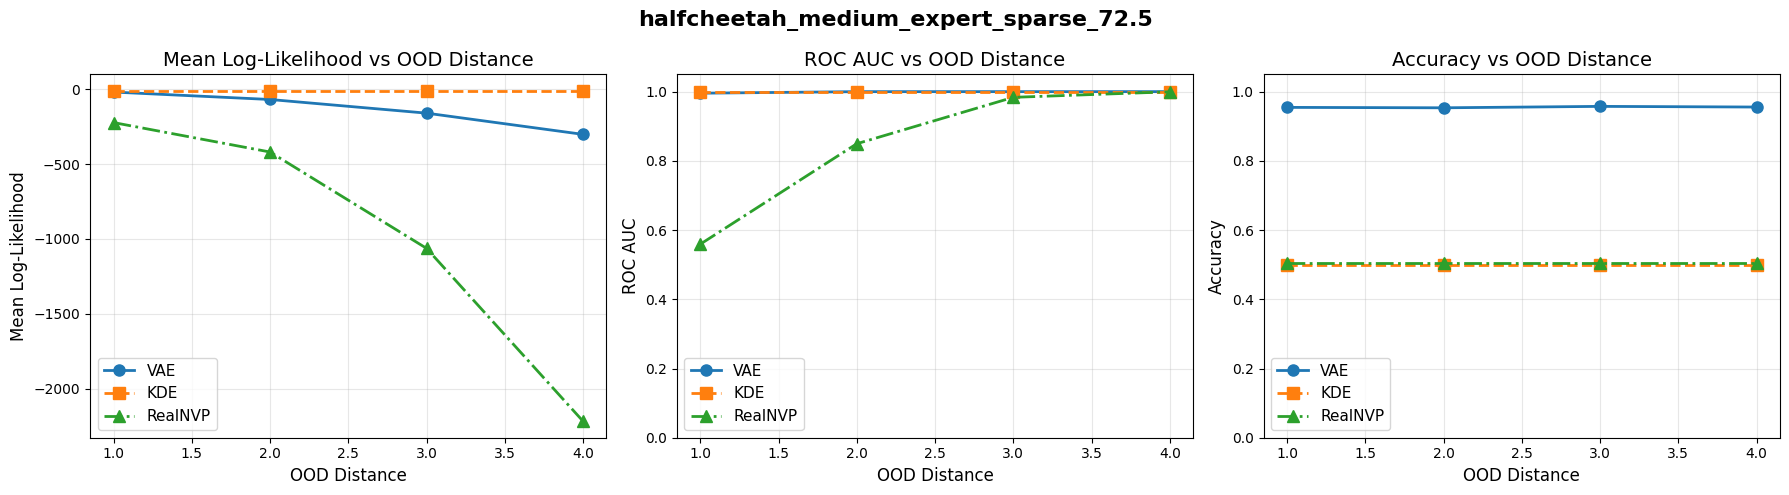


Creating plots for hopper_medium_expert_sparse_78...
  Saved: /home/ubuntu/GORMPO/figures/merged_results/hopper_medium_expert_sparse_78_comparison.png


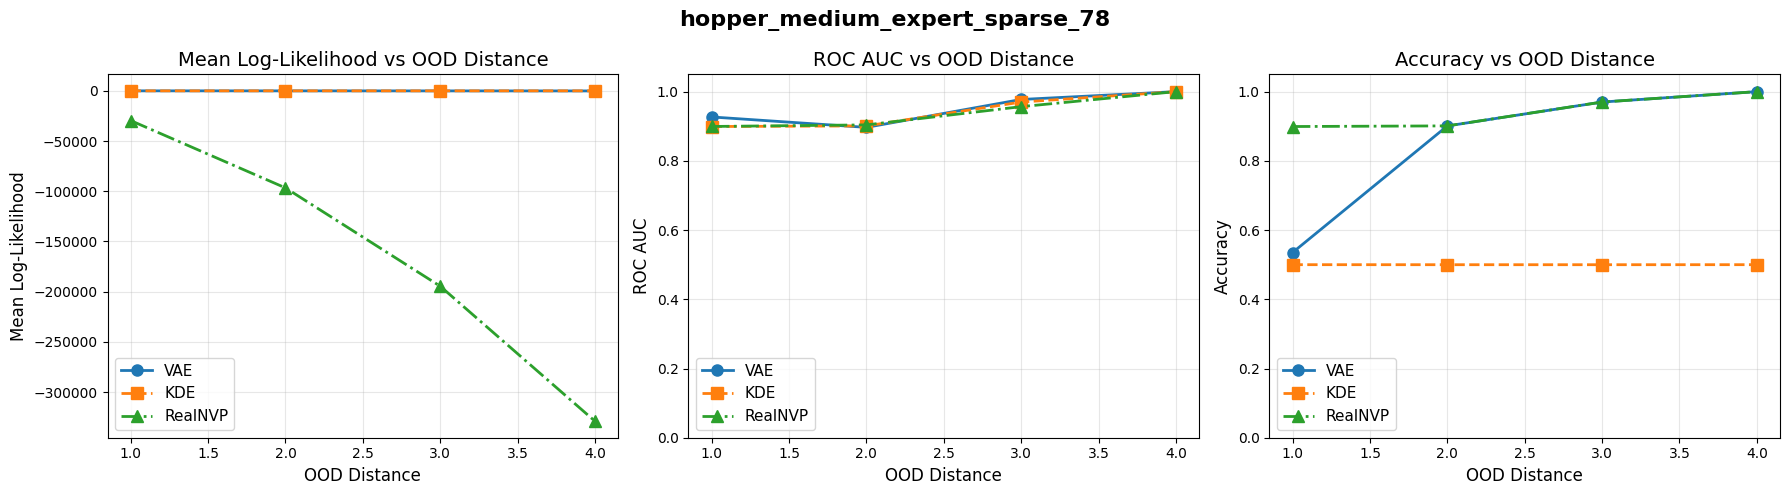


All plots created successfully!


In [2]:
# Define colors and markers for each method
method_styles = {
    'VAE': {'color': '#1f77b4', 'marker': 'o', 'linestyle': '-'},
    'KDE': {'color': '#ff7f0e', 'marker': 's', 'linestyle': '--'},
    'RealNVP': {'color': '#2ca02c', 'marker': '^', 'linestyle': '-.'}
}

# Create plots for each dataset
for dataset_name, methods_data in results_by_dataset.items():
    print(f"\nCreating plots for {dataset_name}...")
    
    # Create figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{dataset_name}', fontsize=16, fontweight='bold')
    
    # Plot 1: Mean Log-Likelihood
    ax1 = axes[0]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        mean_ll = [d['mean_log_likelihood'] for d in data]
        style = method_styles[method_name]
        ax1.plot(distances, mean_ll, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    ax1.set_xlabel('OOD Distance', fontsize=12)
    ax1.set_ylabel('Mean Log-Likelihood', fontsize=12)
    ax1.set_title('Mean Log-Likelihood vs OOD Distance', fontsize=14)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: ROC AUC
    ax2 = axes[1]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        roc_auc = [d['roc_auc'] for d in data]
        style = method_styles[method_name]
        ax2.plot(distances, roc_auc, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    ax2.set_xlabel('OOD Distance', fontsize=12)
    ax2.set_ylabel('ROC AUC', fontsize=12)
    ax2.set_title('ROC AUC vs OOD Distance', fontsize=14)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1.05])
    
    # Plot 3: Accuracy
    ax3 = axes[2]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        accuracy = [d['accuracy'] for d in data]
        style = method_styles[method_name]
        ax3.plot(distances, accuracy, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=8)
    
    ax3.set_xlabel('OOD Distance', fontsize=12)
    ax3.set_ylabel('Accuracy', fontsize=12)
    ax3.set_title('Accuracy vs OOD Distance', fontsize=14)
    ax3.legend(fontsize=11)
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim([0, 1.05])
    
    plt.tight_layout()
    
    # Save the figure
    output_dir = base_dir / 'merged_results'
    output_dir.mkdir(exist_ok=True)
    output_file = output_dir / f'{dataset_name}_comparison.png'
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"  Saved: {output_file}")
    
    plt.show()

print("\nAll plots created successfully!")

In [3]:
# Optional: Create a summary table showing key metrics
import pandas as pd

print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

for dataset_name, methods_data in results_by_dataset.items():
    print(f"\n{dataset_name}:")
    print("-" * 80)
    
    for method_name, data in methods_data.items():
        print(f"\n  {method_name}:")
        df = pd.DataFrame(data)
        print(df.to_string(index=False))
    print()


SUMMARY OF RESULTS

walker2d_medium_expert_sparse_73:
--------------------------------------------------------------------------------

  VAE:
 distance  mean_log_likelihood  id_log_likelihood  ood_log_likelihood  roc_auc  accuracy
      1.0           -15.769012          -3.163749          -28.374275 0.998623  0.993900
      2.0           -40.984543          -3.250790          -78.718292 0.938415  0.939548
      3.0           -78.960892          -3.253228         -154.668564 0.936285  0.938070
      4.0          -140.934296          -3.134230         -278.734375 1.000000  0.993800

  KDE:
 distance  mean_log_likelihood  id_log_likelihood  ood_log_likelihood  roc_auc  accuracy
      1.0           -11.752250          -0.478652          -23.025850 1.000000       0.5
      2.0           -10.544008          -0.502836          -20.585182 0.924943       0.5
      3.0           -10.491272          -0.504051          -20.478497 0.921311       0.5
      4.0           -11.752250          -0.4786